# Metrics for ANN

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

In [10]:
predictions = pd.read_csv("ANN_features/ann_test_results_final.csv",index_col=0)
print(len(predictions))
predictions.head()

30000


,ann_test_result
0,0
1,2
2,0
3,0
4,5


In [11]:
test = pd.read_csv("ANN_features/test_200.csv",index_col=0)
y_test_lang = test['lang']
y_test = y_test_lang.map({"eng": 0, "deu": 1, "spa": 2, "fra": 3, "por": 4, "ita": 5})

print(len(y_test))
y_test.head()

30000


0    0
1    2
2    0
3    0
4    5
Name: lang, dtype: int64

In [12]:
accuracy_score(y_test,predictions)

0.9821

In [5]:
print(confusion_matrix(y_test,predictions))

[[5016   19   13   23   10   13]
 [   4 5053    2    7    1    4]
 [   7    4 4863   20   81   29]
 [   6    4   21 4880   12   21]
 [   1    1  156   12 4765   25]
 [   5    1   61   26   27 4807]]


In [6]:
print(classification_report(y_test,predictions,digits=4)) 

              precision    recall  f1-score   support

           0     0.9954    0.9847    0.9900      5094
           1     0.9943    0.9965    0.9954      5071
           2     0.9505    0.9718    0.9611      5004
           3     0.9823    0.9871    0.9847      4944
           4     0.9732    0.9607    0.9669      4960
           5     0.9812    0.9756    0.9784      4927

   micro avg     0.9795    0.9795    0.9795     30000
   macro avg     0.9795    0.9794    0.9794     30000
weighted avg     0.9796    0.9795    0.9795     30000



### Heatmap 

In [7]:
lang = ['eng','deu','spa','fra','por','ita']
conf_matrix = confusion_matrix(y_test,predictions)
test_data = pd.DataFrame(conf_matrix,columns=lang,index=lang)
test_data

,eng,deu,spa,fra,por,ita
eng,5016,19,13,23,10,13
deu,4,5053,2,7,1,4
spa,7,4,4863,20,81,29
fra,6,4,21,4880,12,21
por,1,1,156,12,4765,25
ita,5,1,61,26,27,4807


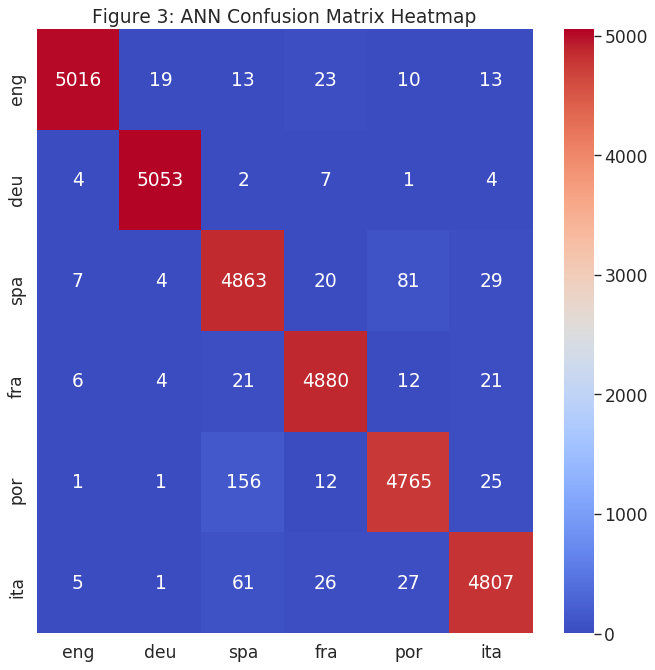

In [8]:
plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
sns.set(font_scale=1.4)
ax = plt.axes()
sns.heatmap(test_data,cmap='coolwarm',ax=ax,annot=True,fmt='.5g')
ax.set_title('Figure 3: ANN Confusion Matrix Heatmap')
plt.show()